# Autocorrelation model (Figure 2)

In [1]:
import numpy as np
import string
from cycler import cycler

import matplotlib.pyplot as plt
from resonance.neuralnodes import utils
from resonance import plotting

from resonance.autocorr.params import Params
from resonance.autocorr.model import run_model


alphabet = list(string.ascii_uppercase)
plt.style.use('ncb.mplstyle')

## Generate model outputs

In [2]:
fs = 10_000.0
stim_step = 0.1
max_len = 20

input_stim, s, paui, duri = utils.makePPFstim(ppauMax=max_len, pdurMax=max_len, cdur=400, cpau=0, Fs=fs, step=stim_step)

input_stim = np.array(input_stim)
new_points = np.array([s['ppau'], s['pdur']]).T / fs * 1000
paui = paui / fs * 1000
duri = duri / fs * 1000

params = Params.from_yaml('params/autocorr_20230304_201303_20_params.yaml')
print(params)
outs = run_model(input_stim, params, fs)
outs[0].shape
ppf = np.nanmean(outs[0][250:-100], axis=0)

ppf = ppf.reshape((len(duri), len(paui)))

Params(delay=0.017012078363592184, nonlinearity_gain=0.2133492734657785)


In [3]:
ppf.shape, 200*200, new_points.shape, duri.shape

((200, 200), 40000, (40000, 2), (200,))

<>:41: SyntaxWarning: invalid escape sequence '\D'
<>:41: SyntaxWarning: invalid escape sequence '\D'
<>:41: SyntaxWarning: invalid escape sequence '\D'
<>:41: SyntaxWarning: invalid escape sequence '\D'
<>:41: SyntaxWarning: invalid escape sequence '\D'
<>:41: SyntaxWarning: invalid escape sequence '\D'
/var/folders/lz/h0pd23610q36ss5zm1x9kfn0gy02sm/T/ipykernel_92113/3401857815.py:41: SyntaxWarning: invalid escape sequence '\D'
  for per, frq, col in zip(pers, ['$\Delta/4$', '$\Delta/2=T_{s}$', '$\Delta$'], col_per):
/var/folders/lz/h0pd23610q36ss5zm1x9kfn0gy02sm/T/ipykernel_92113/3401857815.py:41: SyntaxWarning: invalid escape sequence '\D'
  for per, frq, col in zip(pers, ['$\Delta/4$', '$\Delta/2=T_{s}$', '$\Delta$'], col_per):
/var/folders/lz/h0pd23610q36ss5zm1x9kfn0gy02sm/T/ipykernel_92113/3401857815.py:41: SyntaxWarning: invalid escape sequence '\D'
  for per, frq, col in zip(pers, ['$\Delta/4$', '$\Delta/2=T_{s}$', '$\Delta$'], col_per):
/var/folders/lz/h0pd23610q36ss5zm1x9kfn0

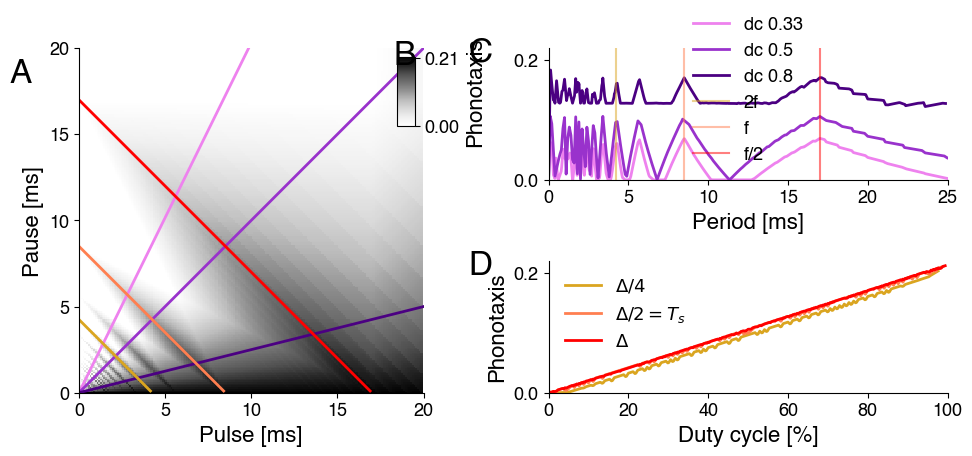

In [4]:
axs = [None, None, None]

plt.figure(figsize=(15, 4.5))

axs[0] = plt.subplot(131)
plotting.ppf(duri, paui, ppf, ax=axs[0])

axs[1] = plt.subplot(232)
axs[2] = plt.subplot(235)


# plotting.ppf(duri, paui, ppf, ax=axs[0])

col_dc = ['violet', 'darkorchid', 'indigo']
col_per = ['goldenrod', 'coral', 'red']

dcs = [0.33, 0.5, 0.8]
T = 17.0
pers = [T/4, T/2, T]

# period transects
plt.sca(axs[1])
for dc, col in zip(dcs, col_dc):
    dur = np.arange(0, max_len+0.1, 0.01)
    pau = dur / dc - dur
    dur = dur[pau <= max_len]
    pau = pau[pau <= max_len]
    axs[0].plot(dur, pau, c=col, linewidth=2)
    plt.plot(pau+dur, plotting.transect(new_points, ppf, dur, pau, grid=False), c=col, label=f'dc {dc}', linewidth=2.0)
plt.xlabel('Period [ms]')
for f, c, l in zip(pers, col_per, ['2f', 'f', 'f/2']):
    plt.axvline(f, c=c, alpha=0.5, label=l)
plt.xlim(0, 25)
plt.ylim(0, 0.22)
plt.yticks([0, 0.2])
plt.legend(frameon=False)

# DC transects
plt.sca(axs[2])
per = 10
for per, frq, col in zip(pers, ['$\Delta/4$', '$\Delta/2=T_{s}$', '$\Delta$'], col_per):
    pau = np.arange(0.1, per, 0.01)
    dur = per - pau
    dc = dur / per
    dur = dur[pau <= max_len]
    pau = pau[pau <= max_len]
    axs[0].plot(dur, pau, c=col, linewidth=2)
    plt.plot(dc * 100, plotting.transect(new_points, ppf, dur, pau, grid=False), c=col, label=f'{frq}', linewidth=2.0)
plt.xlabel('Duty cycle [%]')
plt.ylabel('Phonotaxis')
# for d, c, l in zip(dcs, col_dc, dcs):
#     plt.axvline(d * 100, c=c, alpha=0.5, label=l)
plt.xlim(0, 100)
plt.ylim(0, 0.22)
plt.yticks([0, 0.2])
plt.legend(frameon=False)

plotting.label_axes()
plt.tight_layout()

plt.savefig(f'fig/Fig_autocorr.pdf')

In [5]:
# input_stim, s, paui, duri = utils.makePPFstim(ppauMax=max_len, pdurMax=max_len, cdur=400, cpau=0, Fs=fs, step=stim_step)
# paui = paui / fs * 1000
# duri = duri / fs * 1000

In [6]:
freqs = np.array([1, 1/2, 1/3, 1/4, 1/8])
freqs * 17

array([17.        ,  8.5       ,  5.66666667,  4.25      ,  2.125     ])

### Freq tuning

<>:69: SyntaxWarning: invalid escape sequence '\D'
<>:69: SyntaxWarning: invalid escape sequence '\D'
<>:69: SyntaxWarning: invalid escape sequence '\D'
<>:69: SyntaxWarning: invalid escape sequence '\D'
<>:69: SyntaxWarning: invalid escape sequence '\D'
<>:69: SyntaxWarning: invalid escape sequence '\D'
/var/folders/lz/h0pd23610q36ss5zm1x9kfn0gy02sm/T/ipykernel_92113/115154435.py:69: SyntaxWarning: invalid escape sequence '\D'
  for f, c, l in zip([2/T, 1/T, 1/T/2], col_per, ['$\Delta/4$', '$\Delta/2=T_{s}$', '$\Delta$']):
/var/folders/lz/h0pd23610q36ss5zm1x9kfn0gy02sm/T/ipykernel_92113/115154435.py:69: SyntaxWarning: invalid escape sequence '\D'
  for f, c, l in zip([2/T, 1/T, 1/T/2], col_per, ['$\Delta/4$', '$\Delta/2=T_{s}$', '$\Delta$']):
/var/folders/lz/h0pd23610q36ss5zm1x9kfn0gy02sm/T/ipykernel_92113/115154435.py:69: SyntaxWarning: invalid escape sequence '\D'
  for f, c, l in zip([2/T, 1/T, 1/T/2], col_per, ['$\Delta/4$', '$\Delta/2=T_{s}$', '$\Delta$']):
1 extra bytes in post.

ppers [34.4, 17.2, 8.6, 5.73, 4.3]
pdurs [11.35, 5.68, 2.84, 1.89, 1.42]
ppaus [23.05, 11.52, 5.76, 3.84, 2.88]
pdcs [0.33, 0.33, 0.33, 0.33, 0.33]


feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


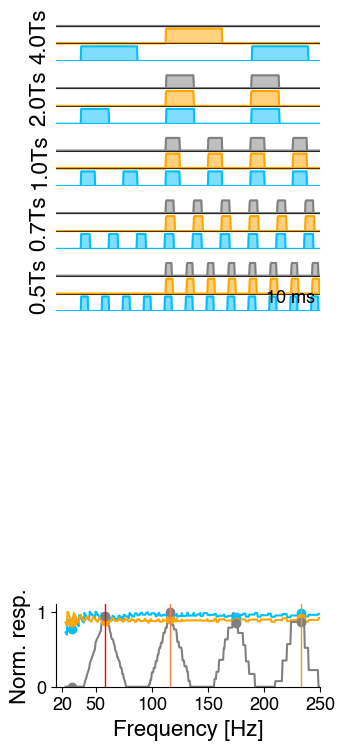

In [7]:
dt = fs/1000
T = 8.6#17.0/2
# ppers = T / np.array(( 0.5,   1 ,  1.5,   2,    3,    4))
ppers = T / np.array((0.25,  0.5,   1 ,  1.5,   2))
pdurs= ppers * 0.33
ppaus= ppers - pdurs
pdcs = pdurs / ppers
print('ppers', [float(f"{p:1.2f}") for p in (pdurs + ppaus)])
print('pdurs', [float(f"{p:1.2f}") for p in pdurs])
print('ppaus', [float(f"{p:1.2f}") for p in ppaus])
print('pdcs', [float(f"{p:1.2f}") for p in pdcs])

cols = ['deepskyblue', 'orange', 'grey']
custom_cycler = cycler(color=cols)

input_stim, s, paui, duri = utils.makePPFstim(ppau=ppaus, pdur=pdurs, cdur=200, cpau=0, Fs=fs, step=stim_step)
input_stim = np.array(input_stim)
outs = run_model(input_stim, params, fs, verbose_output=True)

tuning_coarse = np.array([np.nanmean(out[250:-100, :], axis=0) for out in outs[:-1]]).T
ppers_coarse = ppers

t0 = 0
t1 = 530
stis = np.arange(len(ppers))
# titles = [f'pper {pper:1.1f}ms, dc{int(pdc * 100)}' for pper, pdc in zip(ppers, pdcs)]
titles = [f'{pper/T:1.1f}Ts' for pper, pdc in zip(ppers, pdcs)]
stim_step = 1/fs
plt.figure(figsize=(7.5, 8.8))
for cnt, (sti, title) in enumerate(zip(stis, titles)):

    # plt.axes(ax[lab])
    ax = plt.subplot(len(ppers) + 6, 2, 2*cnt+1)
    ax.set_prop_cycle(cycler(color=cols))
    plt.ylabel(title)
    plotting.pulse(outs[0][:t1, sti], c=cols[0], dt=dt)
    plotting.pulse(outs[1][:t1, sti], offset=1.2, c=cols[1], dt=dt)
    plotting.pulse(outs[2][:t1, sti]*4, offset=2.4, c=cols[2], dt=dt)
    plt.xlim(t0 / dt, t1 / dt)
    plt.ylim(0, 3.5)
    plotting.despine('tbrl')

plotting.scalebar(10, units='ms')
# ppers = T / np.arange(0.4,  4.5, 0.1)
ppers = T / np.arange(0.4,  4.5, 0.01) * 2

pdurs= ppers * 0.33
ppaus= ppers - pdurs
pdcs = pdurs / ppers

input_stim, s, paui, duri = utils.makePPFstim(ppau=ppaus, pdur=pdurs, cdur=200, cpau=0, Fs=fs, step=stim_step)
input_stim = np.array(input_stim)
outs = run_model(input_stim, params, fs, verbose_output=True)

tuning = np.array([np.nanmean(out[250:-100, :], axis=0) for out in outs[:-1]]).T
nrm = np.max(tuning, axis=0, keepdims=True)

ax = plt.subplot(7, 2, 13)
ax.set_prop_cycle(custom_cycler)
plt.plot(1000/ppers, tuning / nrm, '-')
plt.plot(1000/ppers_coarse, tuning_coarse / nrm, 'o')
plt.xlim(15, 250)
plt.ylim(0, 1.1)
plt.yticks([0, 1])
plt.xticks([20, 50, 100, 150, 200, 250])
plt.xlabel('Frequency [Hz]')
plt.ylabel('Norm. resp.')

for f, c, l in zip([2/T, 1/T, 1/T/2], col_per, ['$\Delta/4$', '$\Delta/2=T_{s}$', '$\Delta$']):
    plt.axvline(f*1000, c=c, linewidth=1.0, label=l)
# plt.tight_layout()
# plotting.label_axes()

plt.savefig(f'fig/Fig_autocorr_freq.pdf')


#### DC bias

ppers [25.8, 25.8, 25.8, 25.8]
pdurs [6.45, 12.9, 19.35, 25.8]
ppaus [19.35, 12.9, 6.45, 0.0]
pdcs [0.25, 0.5, 0.75, 1.0]
ppers [12.9, 12.9, 12.9, 12.9]
pdurs [3.22, 6.45, 9.67, 12.9]
ppaus [9.67, 6.45, 3.22, 0.0]
pdcs [0.25, 0.5, 0.75, 1.0]


1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


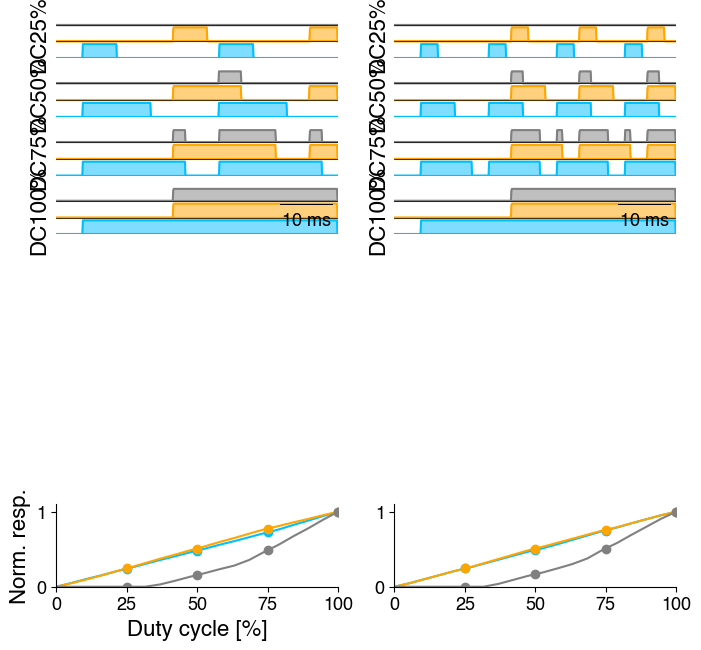

In [8]:
cols = ['deepskyblue', 'orange', 'grey']
custom_cycler = cycler(color=cols)

plt.figure(figsize=(8, 7.5))
for Tcnt, T in enumerate([17.2, 8.6]):
    ppers = T / np.ones((4,)) * 1.5
    ppers = np.array(ppers)
    pdurs= ppers * np.array([0.25, 0.5, 0.75, 1.0])
    ppaus= ppers - pdurs
    pdcs = pdurs / ppers
    print('ppers', [float(f"{p:1.2f}") for p in (pdurs + ppaus)])
    print('pdurs', [float(f"{p:1.2f}") for p in pdurs])
    print('ppaus', [float(f"{p:1.2f}") for p in ppaus])
    print('pdcs', [float(f"{p:1.2f}") for p in pdcs])

    input_stim, s, paui, duri = utils.makePPFstim(ppau=ppaus, pdur=pdurs, cdur=200, cpau=0, Fs=fs, step=stim_step)
    input_stim = np.array(input_stim)
    outs = run_model(input_stim, params, fs, verbose_output=True)

    tuning_coarse = np.array([np.nanmean(out[250:-100, :], axis=0) for out in outs[:-1]]).T
    pdcs_coarse = pdcs

    t0 = 0
    t1 = 530
    stis = np.arange(len(ppers))
    titles = [f'DC{int(pdc * 100)}%' for pper, pdc in zip(ppers, pdcs)]

    for cnt, (sti, title) in enumerate(zip(stis, titles)):

        # plt.axes(ax[lab])
        ax = plt.subplot(len(ppers) + 6, 2, 2*cnt+1+Tcnt)
        ax.set_prop_cycle(cycler(color=cols))
        plt.ylabel(title)
        plotting.pulse(outs[0][:t1, sti], c=cols[0], dt=dt)
        plotting.pulse(outs[1][:t1, sti], offset=1.2, c=cols[1], dt=dt)
        plotting.pulse(outs[2][:t1, sti]*4, offset=2.4, c=cols[2], dt=dt)
        plt.xlim(t0/dt, t1/dt)
        plt.ylim(0, 3.5)
        plotting.despine('tbrl')

    plotting.scalebar(10, units='ms')

    ppers = T / np.ones((20,)) * 1.5
    ppers = np.array(ppers)
    pdurs= ppers * np.linspace(0, 1, 20)
    ppaus= ppers - pdurs
    pdcs = pdurs / ppers

    input_stim, s, paui, duri = utils.makePPFstim(ppau=ppaus, pdur=pdurs, cdur=200, cpau=0, Fs=fs, step=stim_step)
    input_stim = np.array(input_stim)
    outs = run_model(input_stim, params, fs, verbose_output=True)

    tuning = np.array([np.nanmean(out[250:-100, :], axis=0) for out in outs[:-1]]).T
    nrm = np.max(tuning, axis=0, keepdims=True)

    ax = plt.subplot(6, 2, 6*2-1+Tcnt)
    ax.set_prop_cycle(custom_cycler)
    plt.plot(100*pdcs, tuning / nrm, '-')
    plt.plot(100*pdcs_coarse, tuning_coarse / nrm, 'o')
    plt.xticks([0, 25, 50,75, 100])
    plt.ylim(0, 1.1)
    plt.yticks([0, 1])
    if Tcnt==0:
        plt.xlabel('Duty cycle [%]')
        plt.ylabel('Norm. resp.')

    # plt.tight_layout()
plt.savefig(f'fig/Fig_autocorr_dc.pdf')
